In [1]:
# creating neural network for image classification using keras api

import keras
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# checking whick backend the keras using

keras.backend.backend()

'tensorflow'

In [3]:
# importing the fashion MNIST Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images from
# keras api documentation - keras.io/datasent

from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
# to indentify the number of images and their shape in pixels of x_train

x_train.shape

(60000, 28, 28)

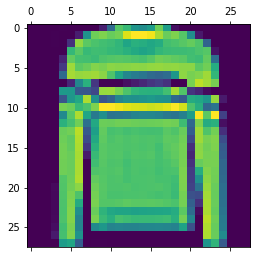

In [5]:
# retriving a matrix show of a pull over using matpoltlib library
plt.matshow(x_train[5])

In [6]:
# checking the corresponding label
y_train[5]

2

In [7]:
# normalizing the value from 0-255 to 0-1 
x_train=x_train/255
x_test=x_test/255

In [8]:
# a keras Sequential used to create a linear stack of nural network model 
# by passing a list of layer instances to the constructor
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [9]:
# creating a sequential model
model = Sequential()

In [10]:
# adding a input layer into model and flattening(converting 2 dimentional array into 1 dimentional array)
# the input shape as our datasets images are 28*28 px 

model.add(Flatten(input_shape=[28,28]))

# adding the dense(hidden) layer and adding 150 nurons for test to reach the closest to perfection
# and activating the nurorns using a relu function

model.add(Dense(150, activation="relu"))

# adding the output layer as our input values got 10 classifications
# using softmax its gives us 10 distict probabilites

model.add(Dense(10, activation="softmax"))

In [11]:
# viewing the summary of the model to knw wht our input, hidden and output layer says

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________


In [12]:
# compiling the model 
# using loss function 
# adam optimizer to train our neural network to adjust the weighs of the edges while training our dataset
# using accuracy metrics while training

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [22]:
# start training using fit function with 6 epochs(iteration) 

model.fit(x_train, y_train, epochs=6)

Epoch 1/6
60000/60000 [==============================] - 5s 81us/step - loss: 0.2772 - accuracy: 0.8975
Epoch 2/6
60000/60000 [==============================] - 5s 86us/step - loss: 0.2658 - accuracy: 0.9000
Epoch 3/6
60000/60000 [==============================] - 5s 82us/step - loss: 0.2534 - accuracy: 0.9067
Epoch 4/6
60000/60000 [==============================] - 6s 101us/step - loss: 0.2428 - accuracy: 0.9107
Epoch 5/6
60000/60000 [==============================] - 6s 99us/step - loss: 0.2353 - accuracy: 0.9122
Epoch 6/6
60000/60000 [==============================] - 7s 118us/step - loss: 0.2270 - accuracy: 0.9154


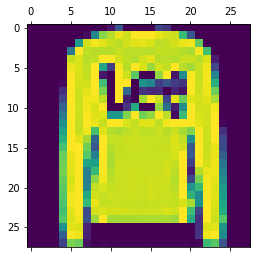

In [35]:
plt.matshow(x_test[1])

In [15]:
x_test.shape

(10000, 28, 28)

In [16]:
# to get the prediction of above 10k images
yp = model.predict(x_test)

In [36]:
yp[2]

array([1.3685854e-08, 1.0000000e+00, 5.0022902e-11, 1.7388796e-09,
       1.8458952e-08, 7.3699098e-16, 1.1891825e-10, 8.3893737e-20,
       5.4939411e-11, 1.3796704e-14], dtype=float32)

In [37]:
# using nump to retrieve the highest index
np.argmax(yp[2])

1

In [41]:
# call ivaluate method to measure the acuracy predictiong x_test comparing to y_test
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 33us/step


[0.32812392567396165, 0.8855999708175659]

In [20]:
# input the labels 
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [42]:
# getting the label
class_labels[np.argmax(yp[2])]

'Trouser'